# Problem

From an image, use the gradient concept to detect edges in the image and perform matrix multiplication operations on the image.


## Steps to detect edges:


1. Calculate the gradient vector (partial derivative) of each pixel for each of the x and y axes with the formula:

$ \dfrac{\partial I}{\partial x} , \dfrac{\partial I}{\partial y} $

2. Calculate the gradient magnitude of each pixel with the formula:


$ \sqrt{\displaystyle(\dfrac{\partial I}{\partial x})^2 + (\dfrac{\partial I}{\partial y})^2} $


3. make a matrix operation with any value that corresponds to the image size and according to the matrix multiplication rule.


# Import Library

In [1]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

# Data Loading

transforms the image data into an array, as follows:

In [2]:
gambar=plt.imread('gambar.jpg')

# Data Transformation

see the array in the image, as follows:

In [3]:
gambar

array([[[ 86,  93,  39],
        [ 88,  93,  39],
        [ 87,  90,  33],
        ...,
        [ 48,  41,  15],
        [ 46,  39,  10],
        [ 59,  52,  23]],

       [[ 77,  84,  30],
        [ 77,  84,  30],
        [ 78,  83,  25],
        ...,
        [ 46,  39,  13],
        [ 64,  57,  29],
        [ 37,  30,   1]],

       [[ 64,  73,  20],
        [ 66,  73,  19],
        [ 68,  73,  17],
        ...,
        [ 56,  48,  25],
        [ 44,  37,   9],
        [ 70,  60,  33]],

       ...,

       [[165, 151, 106],
        [159, 144, 101],
        [151, 134,  91],
        ...,
        [150, 139,  85],
        [149, 138,  84],
        [145, 134,  80]],

       [[164, 149, 106],
        [157, 142,  99],
        [149, 131,  91],
        ...,
        [155, 143,  93],
        [153, 141,  89],
        [148, 136,  84]],

       [[164, 149, 108],
        [157, 142, 101],
        [146, 131,  90],
        ...,
        [160, 148, 100],
        [157, 145,  97],
        [150, 138,  90]]

see the shape array in the image, as follows:

In [4]:
gambar.shape

(438, 780, 3)

# Image Data Exploration

see the image before the preprocessing, as follows:

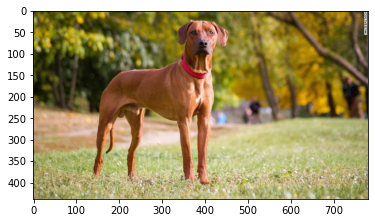

In [5]:
plt.imshow(gambar);

perform image processing when using only red image parameters, as follows:

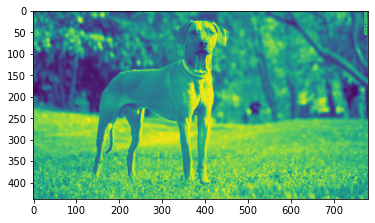

In [6]:
plt.imshow(gambar[:,:,0]);

perform image processing when using the image parameter only the green color, as follows:

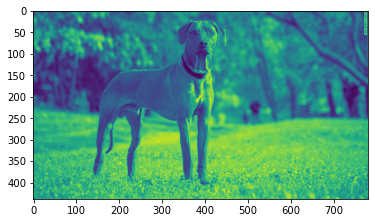

In [7]:
plt.imshow(gambar[:,:,1]);

perform image processing when using the image parameter only the blue color, as follows:

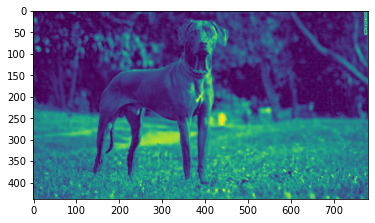

In [8]:
plt.imshow(gambar[:,:,2]);

covert image to greyscale formula

source : https://www.tutorialspoint.com/dip/grayscale_to_rgb_conversion.htm

In [9]:
R=gambar[:,:,0]
G=gambar[:,:,1]
B=gambar[:,:,2]
greyscale=(0.3 * R) + (0.59 * G) + (0.11 * B)

see the form of image transformation to greyscale, as follows:

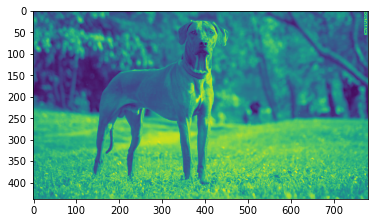

In [10]:
plt.imshow(greyscale);

see the data matrix on the greyscale image, as follows:

In [11]:
greyscale

array([[ 84.96,  85.56,  82.83, ...,  40.24,  37.91,  50.91],
       [ 75.96,  75.96,  75.12, ...,  38.24,  56.02,  28.91],
       [ 64.47,  64.96,  65.34, ...,  47.87,  36.02,  60.03],
       ...,
       [150.25, 143.77, 134.37, ..., 136.36, 135.36, 131.36],
       [148.77, 141.77, 132.  , ..., 141.1 , 138.88, 133.88],
       [148.99, 141.99, 130.99, ..., 146.32, 143.32, 136.32]])

# Calculus Implementation

perform partial derivative calculations with the formula

$ \dfrac{\partial I}{\partial x} , \dfrac{\partial I}{\partial y} $


In [12]:
dx,dy = np.gradient(greyscale)

In [13]:
dx

array([[ -9.   ,  -9.6  ,  -7.71 , ...,  -2.   ,  18.11 , -22.   ],
       [-10.245, -10.3  ,  -8.745, ...,   3.815,  -0.945,   4.56 ],
       [ -8.745,  -9.   ,  -7.89 , ..., 107.225, -13.89 ,  20.17 ],
       ...,
       [ -0.74 ,  -2.245,  -2.685, ...,   1.98 ,   1.37 ,   0.87 ],
       [ -0.63 ,  -0.89 ,  -1.69 , ...,   4.98 ,   3.98 ,   2.48 ],
       [  0.22 ,   0.22 ,  -1.01 , ...,   5.22 ,   4.44 ,   2.44 ]])

In [14]:
dy

array([[  0.6  ,  -1.065,  -2.62 , ...,  -1.59 ,   5.335,  13.   ],
       [  0.   ,  -0.42 ,  -0.82 , ...,   5.855,  -4.665, -27.11 ],
       [  0.49 ,   0.435,   0.675, ...,  -3.145,   6.08 ,  24.01 ],
       ...,
       [ -6.48 ,  -7.94 ,  -9.385, ...,   1.24 ,  -2.5  ,  -4.   ],
       [ -7.   ,  -8.385,  -8.385, ...,   0.39 ,  -3.61 ,  -5.   ],
       [ -7.   ,  -9.   ,  -8.885, ...,  -0.315,  -5.   ,  -7.   ]])

perform gradient magnitude calculations to detect edges with the formula

$ \sqrt{\displaystyle(\dfrac{\partial I}{\partial x})^2 + (\dfrac{\partial I}{\partial y})^2} $


In [15]:
sx = ndimage.sobel(dx,axis=0,mode='constant')
sy = ndimage.sobel(dy,axis=1,mode='constant')
grad_magnitude=np.hypot(sx,sy)

see the results of the gradient magnitude in the image, as follows:

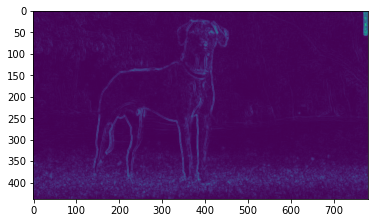

In [16]:
plt.imshow(grad_magnitude);

look at the gradient magnitude array, as follows:

In [17]:
grad_magnitude

array([[ 30.8954139 ,  40.25016397,  35.03222695, ...,  13.80490583,
          7.50875822,  10.14350285],
       [  1.84200977,   4.84574556,   2.38973848, ..., 287.71386837,
         90.67965731,  52.38151224],
       [ 21.45326199,  26.43699349,  20.98708234, ..., 215.57150026,
        211.61128337,  84.37268945],
       ...,
       [ 31.17535966,  12.34982793,  15.57286904, ...,  40.69083066,
         35.81597165,  20.86826119],
       [ 33.99400425,  10.69499065,  20.87431077, ...,  19.3046238 ,
         25.20752913,  15.97631059],
       [ 26.47245219,   6.58665507,  17.36206281, ...,  23.28289555,
         24.28402767,  16.28360218]])

conduct a trial to see the difference if the threshold value is 10,20,30

threshold value of 10, as follows:

In [18]:
threshold = 10
tes1 = np.where(grad_magnitude>=threshold, 1, 0)

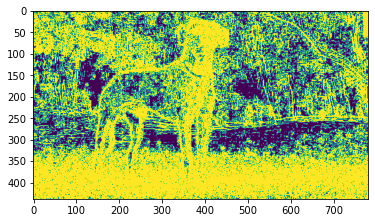

In [19]:
plt.imshow(tes1);

threshold value of 20, as follows:

In [20]:
threshold = 20
tes2 = np.where(grad_magnitude>=threshold, 1, 0)

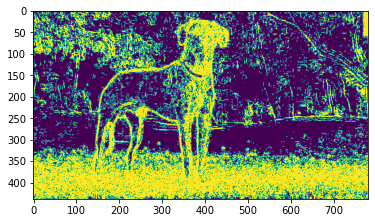

In [21]:
plt.imshow(tes2);

threshold value of 30, as follows:

In [22]:
threshold = 30
tes3 = np.where(grad_magnitude>=threshold, 1, 0)

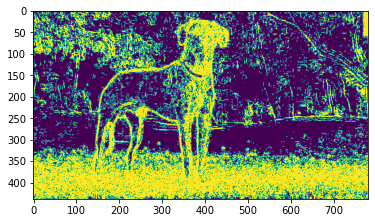

In [23]:
plt.imshow(tes2);

# Linier Algebra Implementation

create a matrix with a function

$2x^2y + xy^2$:


In [24]:
def f(x,y):
    return x**2*y+x*y**2

In [25]:
x=np.linspace(1,50,780)
y=np.linspace(1,100,438)

In [26]:
z=np.array([[f(i,j) for i in x] for j in y])
z

array([[2.00000000e+00, 2.19266002e+00, 2.39323315e+00, ...,
        2.53730979e+03, 2.54365094e+03, 2.55000000e+03],
       [2.73095633e+00, 2.98474061e+00, 3.24823066e+00, ...,
        3.12598208e+03, 3.13377726e+03, 3.14158214e+03],
       [3.56455760e+00, 3.88592261e+00, 4.21878608e+00, ...,
        3.71977370e+03, 3.72902937e+03, 3.73829653e+03],
       ...,
       [1.00091344e+04, 1.06453759e+04, 1.12824053e+04, ...,
        7.41849252e+05, 7.43097557e+05, 7.44346649e+05],
       [1.00545159e+04, 1.06936271e+04, 1.13335279e+04, ...,
        7.44664835e+05, 7.45917402e+05, 7.47170758e+05],
       [1.01000000e+04, 1.07419874e+04, 1.13847662e+04, ...,
        7.47485536e+05, 7.48742373e+05, 7.50000000e+05]])

In [27]:
z.shape

(438, 780)

perform the image matrix multiplication, as follows:

In [28]:
m=tes2*z

In [29]:
m.shape

(438, 780)

# Image Visualization

see the image of the matrix multiplication results, as follows:

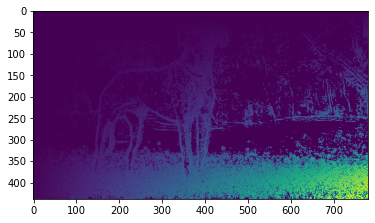

In [30]:
plt.imshow(m)

# Final analysis

1. Looking at the image that was done with three different threshold values, it can be concluded that to determine a good edge detection there is a threshold of 20.

2. perform a multiplication calculation of the image matrix with the function : $2x^2y + xy^2$ produces images from light in the right corner to dark in the upper left corner with dark blue and green color variants